# DS-SF-38 | 12 | Logistic Regression | Codealong | Answer Key

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | Logistic Regression

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-12-iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix and response vector

In [4]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

In [5]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
c = df.Species

In [7]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

## Activity | Create a one-hot encoding/binary variables for the outcome variable

In [8]:
cs = pd.get_dummies(c)

In [9]:
cs

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [10]:
c_Setosa = cs.Setosa
c_Versicolor = cs.Versicolor
c_Virginica = cs.Virginica

## Activity | Run logistic regression to learn whether or not an iris plant is a `Setosa`

- (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [11]:
model_Setosa = linear_model.LogisticRegression().fit(X, c_Setosa)

print model_Setosa.coef_
print model_Setosa.intercept_

[[ 0.41498833  1.46129739 -2.26214118 -1.0290951 ]]
[ 0.26560617]


> ## How good is the model?

In [12]:
model_Setosa.score(X, c_Setosa)

1.0

In [13]:
c_hat_Setosa = model_Setosa.predict(X)

pd.crosstab(c_hat_Setosa,
    c_Setosa,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,100,0
1,0,50


## Versicolor

In [14]:
model_Versicolor = linear_model.LogisticRegression().fit(X, c_Versicolor)

In [15]:
model_Versicolor.score(X, c_Versicolor)

0.69999999999999996

In [16]:
c_hat_Versicolor = model_Versicolor.predict(X)

pd.crosstab(c_hat_Versicolor,
    c_Versicolor,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,90,35
1,10,15


## Virginica

In [17]:
model_Virginica = linear_model.LogisticRegression().fit(X, c_Virginica)

In [18]:
model_Virginica.score(X, c_Virginica)

0.97999999999999998

In [19]:
c_hat_Virginica = model_Virginica.predict(X)

pd.crosstab(c_hat_Virginica,
    c_Virginica,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,97,0
1,3,50


## Activity | Let's combine the models together!

In [20]:
hats = pd.DataFrame({'Setosa': c_hat_Setosa,
    'Versicolor': c_hat_Versicolor,
    'Virginica': c_hat_Virginica})

In [21]:
hats.sum()

Setosa        50
Versicolor    25
Virginica     53
dtype: int64

In [22]:
hats.sum().sum()

128

In [23]:
hats.sum(axis = 1).value_counts()

1    106
0     33
2     11
dtype: int64

In [24]:
pd.crosstab(hats.Setosa, [hats.Versicolor, hats.Virginica])

Versicolor   0       1    
Virginica    0   1   0   1
Setosa                    
0           33  42  14  11
1           50   0   0   0

In [25]:
p_hat_Setosa = pd.Series(model_Setosa.predict_proba(X).T[1])
p_hat_Versicolor = pd.Series(model_Versicolor.predict_proba(X).T[1])
p_hat_Virginica = pd.Series(model_Virginica.predict_proba(X).T[1])

hats = pd.DataFrame({'p_Setosa': p_hat_Setosa,
    'p_Versicolor': p_hat_Versicolor,
    'p_Virginica': p_hat_Virginica})

hats['p'] = hats.max(axis = 1)

hats['c'] = 'Setosa'
hats.loc[hats.p_Versicolor == hats.p, 'c'] = 'Versicolor'
hats.loc[hats.p_Virginica == hats.p, 'c'] = 'Virginica'

In [26]:
p_hat_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

In [27]:
hats

,p_Setosa,p_Versicolor,p_Virginica,p,c
0,0.984074,0.134585,0.000012,0.984074,Setosa
1,0.964775,0.241600,0.000037,0.964775,Setosa
2,0.976924,0.167258,0.000030,0.976924,Setosa
3,0.957121,0.202420,0.000067,0.957121,Setosa
4,0.985634,0.112769,0.000012,0.985634,Setosa
...,...,...,...,...,...
145,0.001229,0.248149,0.812828,0.812828,Virginica
146,0.001190,0.490985,0.802547,0.802547,Virginica
147,0.001540,0.315145,0.739502,0.739502,Virginica
148,0.001140,0.136859,0.900496,0.900496,Virginica


In [28]:
(hats.c == c).mean()

0.95999999999999996

In [29]:
(hats.c == c).sum()

144

In [30]:
(hats.c != c).sum()

6

In [31]:
pd.crosstab(
    hats.c,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,45,1
Virginica,0,5,49


## Logistic Regression with `statsmodels`

- (http://statsmodels.sourceforge.net/stable/generated/statsmodels.discrete.discrete_model.Logit.from_formula.html)
- (http://statsmodels.sourceforge.net/stable/generated/statsmodels.discrete.discrete_model.Logit.html)

## Multiclass Logistic Regression with `sklearn`

In [32]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
c = df.Species

model = linear_model.LogisticRegression().fit(X, c)

In [33]:
model.score(X, c)

0.95999999999999996

In [34]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,45,1
Virginica,0,5,49


## Part B | ROC/AUC

### Setosa

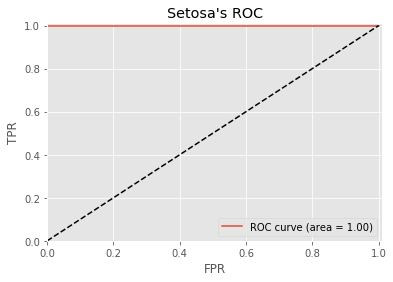

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(c_Setosa, p_hat_Setosa)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("Setosa's ROC")
plt.legend(loc = 'lower right')

In [36]:
metrics.roc_auc_score(c_Setosa, c_hat_Setosa)

1.0

### Versicilor

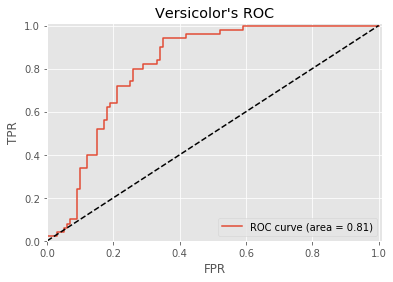

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(c_Versicolor, p_hat_Versicolor)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("Versicolor's ROC")
plt.legend(loc = 'lower right')

In [38]:
metrics.roc_auc_score(c_Versicolor, c_hat_Versicolor)

0.60000000000000009

### Virginica

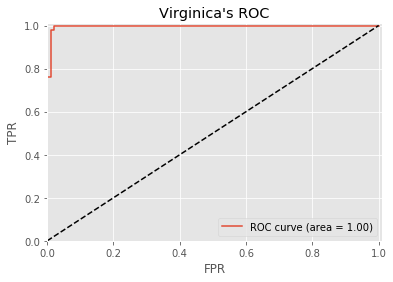

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(c_Virginica, p_hat_Virginica)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("Virginica's ROC")
plt.legend(loc = 'lower right')

In [40]:
metrics.roc_auc_score(c_Virginica, c_hat_Virginica)

0.98499999999999999